# Compute performance metrics for the given Y and Y_score without sklearn

In [ ]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df_a=pd.read_csv('5_a.csv')
print(df_a.head(10))
print('_'*50)
print(df_a.shape)


     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199
5  1.0  0.601600
6  1.0  0.666323
7  1.0  0.567012
8  1.0  0.650230
9  1.0  0.829346
__________________________________________________
(10100, 2)


### Number of points of each class

In [ ]:
c= df_a['y'].value_counts() #Number of points that belong to class 1 and class 0
print(c)

1.0    10000
0.0      100
Name: y, dtype: int64


Hence the Dataset is highly imbalanced towards Class-1

The number of predicted classes are
1    10100
Name: proba, dtype: int64
____________________________________________________________________________________________________
Confusion Matrix=
[[10000   100]
 [    0     0]]
____________________________________________________________________________________________________
F1 Score=0.9950248756218906
____________________________________________________________________________________________________
Accuracy Score=0.9900990099009901
____________________________________________________________________________________________________
AUC Score=0.48829900000000004
____________________________________________________________________________________________________


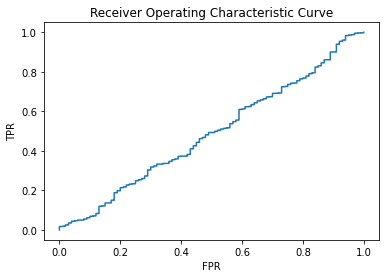

In [ ]:
# write your code here for task A

#1. ROUNDING OFF PROBABILITY SCORES INTO CLASSES

df_a['proba'] = np.where(df_a['proba'] >= 0.5, 1, 0)
print("The number of predicted classes are")
print(df_a['proba'].value_counts())
print('_'*100)

#2. COMPUTE CONFUSION MATRIX

TP= df_a[(df_a['y']==1) & (df_a['proba']==1)].count()[0] #True Positive
FP= df_a[(df_a['y']==0) & (df_a['proba']==1)].count()[0] #False Positive
TN= df_a[(df_a['y']==0) & (df_a['proba']==0)].count()[0] #False Negative
FN= df_a[(df_a['y']==1) & (df_a['proba']==0)].count()[0] #True Negative

C_M= np.matrix([[TP,FP],[FN,TN]]) #Confusion Matrix
print('Confusion Matrix=')
print(C_M)
print('_'*100)

#3. Calculation of F1 Score

#Precision= True Positive/(True Positive+False Positive)--->What % of points are actually Positive out of all predicted Positive Point
# Recall= True Positive/ (True Positive+False Negative)----> True Positive Rate

Pr= TP/(TP+FP) 
Re= TP/(TP+FN)

#F1 Score= (2*Precision*Recall)/ (Precision+Recall)

F1_score= (2*Pr*Re)/(Pr+Re)
print('F1 Score={}'.format(F1_score))
print('_'*100)

#4.Calculation of Accuracy Score= (TP+TN)/(TP+FP+FN+TN)

accuracy_score= (TP+TN)/(TP+FP+FN+TN)
print('Accuracy Score={}'.format(accuracy_score))
print('_'*100)

#5. Calculation of AUC Score- Area Under Receiver Operating Characteristic(ROC) Curve
df_a=pd.read_csv('5_a.csv') #Again we need to use the probability scores.
sortby_prob =df_a.sort_values('proba',ascending=False) #Sorting by probability scores in Descending Order
prob_list= sortby_prob['proba'].tolist()

TPR_list=[] #To append all TPR values for each iteration
FPR_list=[] #To append all FPR values for each iteration

for thr in prob_list: #thr=threshold value
    
    #Wherever the probability is greater than threshold the value is rounded off to 1. Otherwise 0.
    sortby_prob['proba'] = np.where(sortby_prob['proba'] >= thr, 1, 0) 
    
    TP_1= sortby_prob[(sortby_prob['y']==1) & (sortby_prob['proba']==1)].count()[0] #True Positive
    FP_1= sortby_prob[(sortby_prob['y']==0) & (sortby_prob['proba']==1)].count()[0] #False Positive
    TN_1= sortby_prob[(sortby_prob['y']==0) & (sortby_prob['proba']==0)].count()[0] #False Negative
    FN_1 =sortby_prob[(sortby_prob['y']==1) & (sortby_prob['proba']==0)].count()[0] #True Negative
    
    TPR= TP_1/(TP_1+ FN_1) #True Positive Rate= What % of points are actually +ve out of all the predicted +ve points
    FPR= FP_1/(FP_1+TN_1)  #False Positive Rate= What % of points are predicted as 1 when they are actually 0.
    
    TPR_list.append(TPR)
    FPR_list.append(FPR)
    
    sortby_prob =df_a.sort_values('proba',ascending=False) #reverting into original sorted probabilities for next iteration

AUC_score= np.trapz(TPR_list,FPR_list)
print("AUC Score={}".format(AUC_score))
print('_'*100)  

# 6. Plot of ROC Curve

import matplotlib.pyplot as plt
plt.plot(FPR_list, TPR_list)
plt.title("Receiver Operating Characteristic Curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df_b=pd.read_csv('5_b.csv')
print(df_b.head(10))
print('_'*50)
print(df_b.shape)

     y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648
5  0.0  0.190260
6  0.0  0.320328
7  0.0  0.435013
8  0.0  0.284849
9  0.0  0.427919
__________________________________________________
(10100, 2)


### Number of points of each class

In [ ]:
c1= df_b['y'].value_counts() #Number of points that belong to class 1 and class 0
print(c1)

0.0    10000
1.0      100
Name: y, dtype: int64


Hence the Dataset is highly imbalanced towards Class-0

The number of predicted classes are
0    9806
1     294
Name: proba, dtype: int64
____________________________________________________________________________________________________
Confusion Matrix=
[[  55  239]
 [  45 9761]]
____________________________________________________________________________________________________
F1 Score=0.2791878172588833
____________________________________________________________________________________________________
Accuracy Score=0.9718811881188119
____________________________________________________________________________________________________
AUC =0.9377570000000001
____________________________________________________________________________________________________


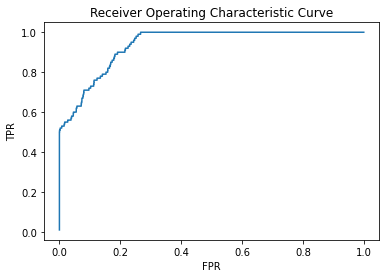

In [ ]:
# write your code here for task B

#1. ROUNDING OFF PROBABILITY SCORES INTO CLASSES
df_b['proba'] = np.where(df_b['proba'] >= 0.5, 1, 0)
print("The number of predicted classes are")
print(df_b['proba'].value_counts())
print('_'*100)

#2. COMPUTE CONFUSION MATRIX

TP2= df_b[(df_b['y']==1) & (df_b['proba']==1)].count()[0] #True Positive
FP2= df_b[(df_b['y']==0) & (df_b['proba']==1)].count()[0] #False Positive
TN2= df_b[(df_b['y']==0) & (df_b['proba']==0)].count()[0] #False Negative
FN2= df_b[(df_b['y']==1) & (df_b['proba']==0)].count()[0] #True Negative

C_M_2= np.matrix([[TP2,FP2],[FN2,TN2]]) #Confusion Matrix
print('Confusion Matrix=')
print(C_M_2)
print('_'*100)

#3. Calculation of F1 Score

#Precision= True Positive/(True Positive+False Positive)--->What % of points are actually Positive out of all predicted Positive Point
# Recall= True Positive/ (True Positive+False Negative)----> True Positive Rate

Pr2= TP2/(TP2+FP2) 
Re2= TP2/(TP2+FN2)

#F1 Score= (2*Precision*Recall)/ (Precision+Recall)

F1_score_2= (2*Pr2*Re2)/(Pr2+Re2)
print('F1 Score={}'.format(F1_score_2))
print('_'*100)

#4.Calculation of Accuracy Score= (TP+TN)/(TP+FP+FN+TN)

accuracy_score_2= (TP2+TN2)/(TP2+FP2+FN2+TN2)
print('Accuracy Score={}'.format(accuracy_score_2))
print('_'*100)

#5. Calculation of AUC Score- Area Under Receiver Operating Characteristic(ROC) Curve
df_b=pd.read_csv('5_b.csv') #Again we need to use the probability scores.
sortby_prob_2 =df_b.sort_values('proba',ascending=False) #Sorting by probability scores in Descending Order
prob_list_2= sortby_prob_2['proba'].tolist()

TPR_list_2=[] #To append all TPR values for each iteration
FPR_list_2=[] #To append all FPR values for each iteration

for thr2 in prob_list_2: #thr2=threshold value
    
    #Wherever the probability is greater than threshold the value is rounded off to 1. Otherwise 0.
    sortby_prob_2['proba'] = np.where(sortby_prob_2['proba'] >= thr2, 1, 0) 
    
    TP_2= sortby_prob_2[(sortby_prob_2['y']==1) & (sortby_prob_2['proba']==1)].count()[0] #True Positive
    FP_2= sortby_prob_2[(sortby_prob_2['y']==0) & (sortby_prob_2['proba']==1)].count()[0] #False Positive
    TN_2= sortby_prob_2[(sortby_prob_2['y']==0) & (sortby_prob_2['proba']==0)].count()[0] #False Negative
    FN_2 =sortby_prob_2[(sortby_prob_2['y']==1) & (sortby_prob_2['proba']==0)].count()[0] #True Negative
    
    TPR2= TP_2/(TP_2+ FN_2) #True Positive Rate= What % of points are actually +ve out of all the predicted +ve points
    FPR2= FP_2/(FP_2+TN_2)  #False Positive Rate= What % of points are predicted as 1 when they are actually 0.
    
    TPR_list_2.append(TPR2)
    FPR_list_2.append(FPR2)
    
    sortby_prob_2 =df_b.sort_values('proba',ascending=False) #reverting into original sorted probabilities for next iteration

AUC_score_2= np.trapz(TPR_list_2,FPR_list_2)
print("AUC ={}".format(AUC_score_2))
print('_'*100)

# 6. Plot of ROC Curve

import matplotlib.pyplot as plt
plt.plot(FPR_list_2, TPR_list_2)
plt.title("Receiver Operating Characteristic Curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df_c=pd.read_csv('5_c.csv')
df_c.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [ ]:
 # write your code for task C

sortby_prob_3 =df_c.sort_values('prob',ascending=False) #Sorting by probability scores in Descending Order
prob_list_3= sortby_prob_3['prob'].tolist()

list_A=[] #to append each a value

for thr3 in prob_list_3:
    #Wherever the probability is greater than threshold the value is rounded off to 1. Otherwise 0.
    sortby_prob_3['prob'] = np.where(sortby_prob_3['prob'] >= thr3, 1, 0)
    
    FP_3= sortby_prob_3[(sortby_prob_3['y']==0) & (sortby_prob_3['prob']==1)].count()[0] #False Positive
    FN_3 =sortby_prob_3[(sortby_prob_3['y']==1) & (sortby_prob_3['prob']==0)].count()[0] #True Negative
    
    A= (500*FN_3)+(100*FP_3) #metric
    
    list_A.append(A)
    
    sortby_prob_3 =df_c.sort_values('prob',ascending=False)
    
dict_A= dict(zip(list_A, prob_list_3 )) #combining each value of A to corresponding threshold as a dictionary

min_key= min(dict_A.keys()) #for minimum value of A

print("The best threshold is that corresponding to the least value of A")
print("Hence the best threshold is {}".format(dict_A[min_key]))
print('_'*100)

The best threshold is that corresponding to the least value of A
Hence the best threshold is 0.2300390278970873
____________________________________________________________________________________________________



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
df_d=pd.read_csv('5_d.csv')
df_d

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
...,...,...
157195,87.0,83.0
157196,97.0,86.0
157197,106.0,93.0
157198,105.0,101.0


In [ ]:
 # write your code for task 5d

#1. Mean Square Error= 1/n*(summation(y-y_pred)^2), where n=total number of datapoints

n= len(df_d)
df_d['diff_sq']= (df_d['y']-df_d['pred'])**2
S= df_d['diff_sq'].sum()
mse= S/n
print("Mean Square Error= {}".format(mse))
print('_'*100)

#2 MAPE= Mean Absolute Percentage Error= 1/n (summation(|y-ypred|)/y)
df_d['abs_diff']= (df_d['y']-df_d['pred']).abs() #absolute error
E= df_d['abs_diff'].sum() #sum of all absolute errors
S1= df_d['y'].sum() #we sum up all actual values of y and take it as the denominator to avoid dividing by zero error if an actual value of y is 0.
mape= E/S1
print("MAPE={}".format(mape))
print('_'*100)

# 3. R^2 Error

df_d['err_sq']= (df_d['y']-(S1/n))**2
SS_total= df_d['err_sq'].sum()
SS_residual= df_d['diff_sq'].sum()
R_square= 1-(SS_residual/SS_total)

print("R^2 Error={}".format(R_square))
print('_'*100)


Mean Square Error= 177.16569974554707
____________________________________________________________________________________________________
MAPE=0.1291202994009687
____________________________________________________________________________________________________
R^2 Error=0.9563582786990937
____________________________________________________________________________________________________
